In [1]:
import ebisim as eb
import numpy as np
import matplotlib.pyplot as plt
import os
# os.environ["NUMBA_DISABLE_INTEL_SVML"] = "1"
plt.rcParams['figure.figsize'] = (6,4.5)
plt.rcParams['figure.dpi'] = 72
# eb.simulation._advanced.compile_adv_model()

print(os.environ.get("NUMBA_DISABLE_INTEL_SVML", "Not set"))

Not set


7.505123096819539


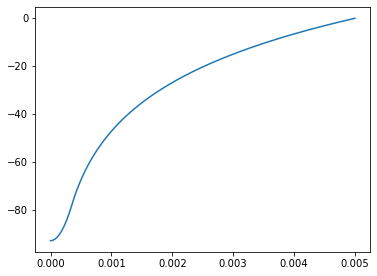

In [2]:
K = eb.Target.get_ions("K", 2e8, kT=8)
dev = eb.Device.get(0.05, 2660, 3.5e-4, 0.8, 600, 2, 0.005, n_grid=300, fwhm=None)
plt.plot(dev.rad_grid, dev.rad_phi_uncomp)
print(dev.fwhm)

In [3]:
kres = eb.advanced_simulation(
    dev, K, 1,
    options=eb.ModelOptions(RADIAL_DYNAMICS=True, DR=True, RECOMPUTE_CROSS_SECTIONS=True),
    solver_kwargs={"method":"Radau","dense_output":False, "max_step":.01,},
    rates=True
)
_kres = eb.advanced_simulation(
    dev, K, 1,
    options=eb.ModelOptions(RADIAL_DYNAMICS=True, DR=False, RECOMPUTE_CROSS_SECTIONS=True),
    solver_kwargs={"method":"Radau","dense_output":False, "max_step":.01,},
    rates=True
)


Integration finished: 7783 calls                    
The solver successfully reached the end of the integration interval.
Calls: 7783 of which ~2938 normal (37.75%) and ~4840 for jacobian approximation (62.19%)
Rates finished: 291 rates

Integration finished: 7759 calls                    
The solver successfully reached the end of the integration interval.
Calls: 7759 of which ~2910 normal (37.50%) and ~4840 for jacobian approximation (62.38%)
Rates finished: 290 rates


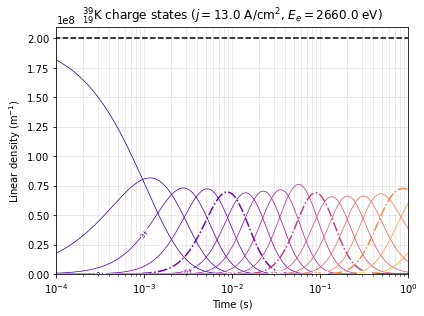

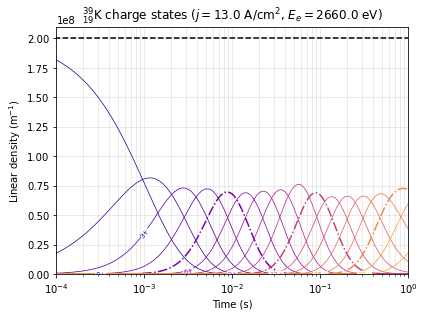

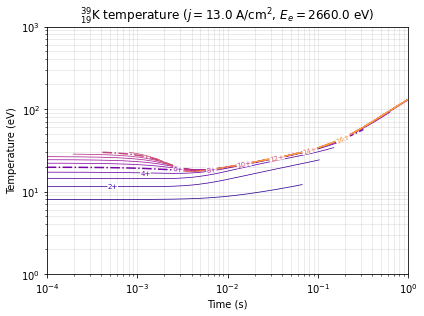

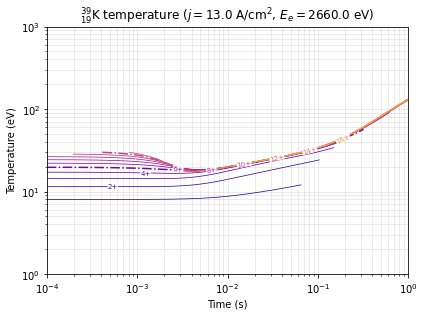

In [4]:
kres.plot()
_ = _kres.plot()
kres.plot_temperature()
_ = _kres.plot_temperature()

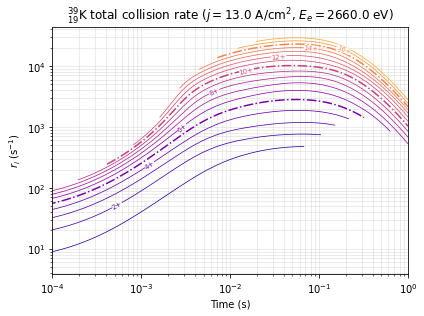

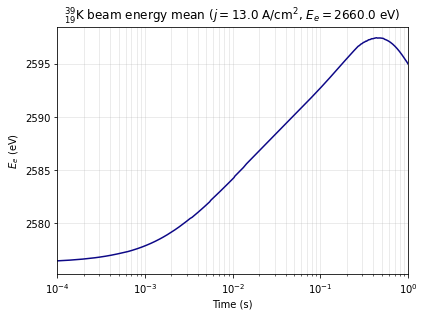

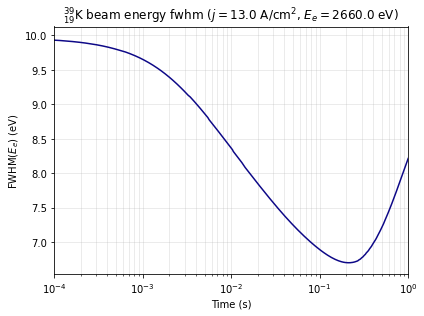

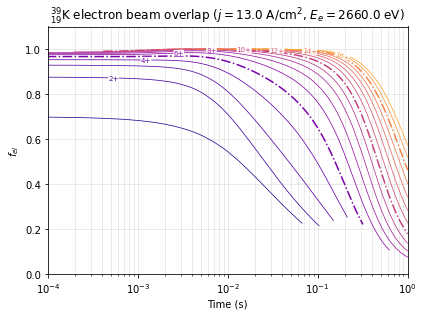

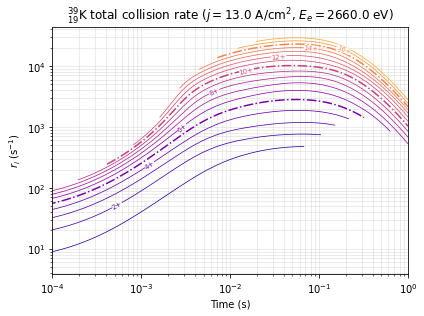

In [5]:
kres.plot_rate(eb.Rate.E_KIN_MEAN)
_ = kres.plot_rate(eb.Rate.E_KIN_FWHM)
kres.plot_rate(eb.Rate.F_EI)
kres.plot_rate(eb.Rate.COLLISION_RATE_TOTAL, yscale="log")

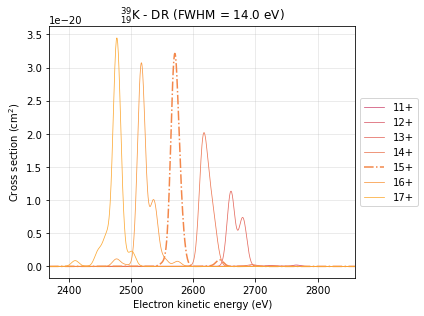

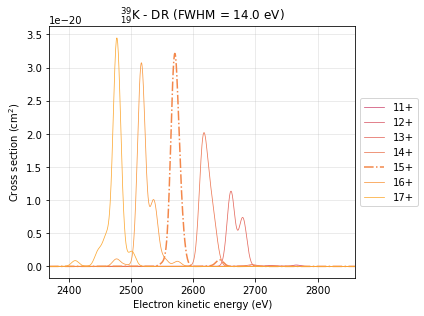

In [6]:
eb.plot_drxs("K", fwhm=14)

In [13]:
K = eb.Target.get_ions("K", 5e8, kT=5)
def fun(element, j, e_kin, t_max, dr_fwhm, solver_kwargs):
    dev = eb.Device.get(0.05, e_kin, 3.5e-4, 0.8, 600, 2, 0.005, n_grid=100, fwhm=None)
    print(e_kin)
    res = eb.advanced_simulation(
            dev, K, t_max,
            options=eb.ModelOptions(RADIAL_DYNAMICS=True, DR=True, RECOMPUTE_CROSS_SECTIONS=True),
            solver_kwargs={"method":"Radau","dense_output":True, "max_step":.01,},
#             rates=True
            verbose=False
        )
    res.model = None
#     del res.target
#     del res.device
#     del res.rates
    del res.param
#     del res.res
    return res

In [16]:
rr = eb.energy_scan(fun, dict(element=19, j=2, e_kin=2, t_max=1, dr_fwhm=2), energies=np.arange(2400, 2800, 10), parallel=True)

/home/hpahl/Repos/EBISSimulation/ebisim/simulation/_energyscan.py:44: UserWarning: sim_kwargs contains a value for e_kin, this item will be ignored.
  warn("sim_kwargs contains a value for e_kin, this item will be ignored.")


240024202440

2520250024602480

2540



2430
2450
2470
2510
2550
2530
2410
2490
2560
2580
2600
2620
2640
2660
2680
2700
2650
2610
2630
2670
2690
2570
2590
2710
2720
2740
2760
2780
2730
2750
2790
2770


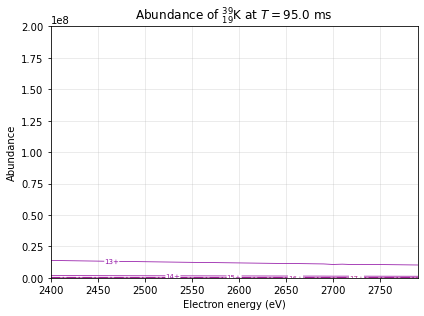

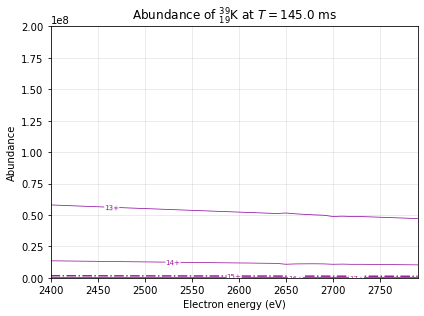

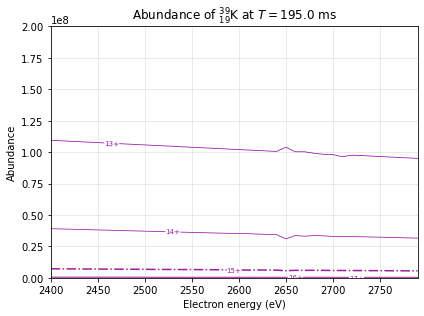

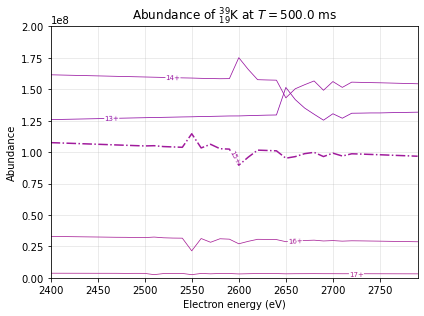

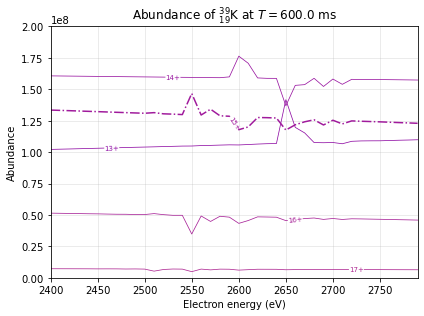

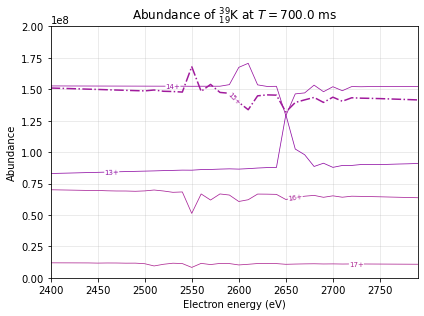

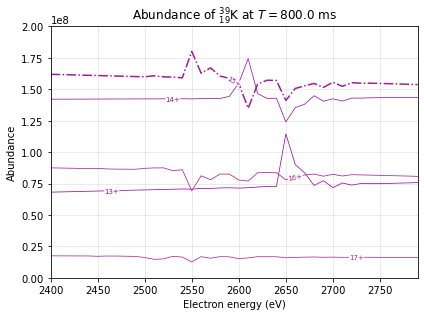

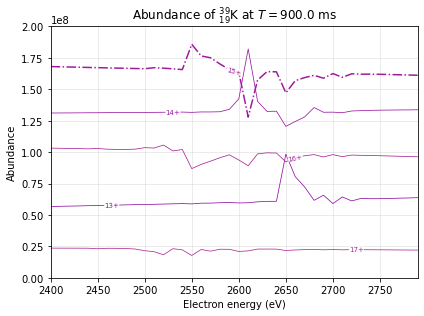

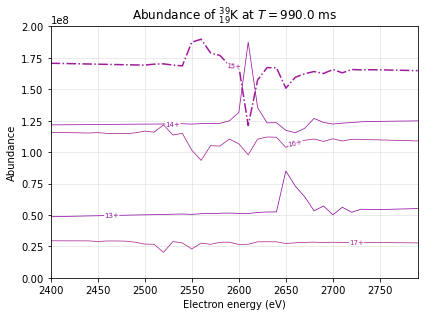

In [19]:
rr.plot_abundance_at_time(0.095, [13, 14,15,16,17], ylim=(0,2e8))
rr.plot_abundance_at_time(0.145, [13, 14,15,16,17], ylim=(0,2e8))
rr.plot_abundance_at_time(0.195, [13, 14,15,16,17], ylim=(0,2e8))

rr.plot_abundance_at_time(0.5, [13, 14,15,16,17], ylim=(0,2e8))
rr.plot_abundance_at_time(0.6, [13, 14,15,16,17], ylim=(0,2e8))
rr.plot_abundance_at_time(0.7, [13, 14,15,16,17], ylim=(0,2e8))
rr.plot_abundance_at_time(0.8, [13, 14,15,16,17], ylim=(0,2e8))
rr.plot_abundance_at_time(0.9, [13, 14,15,16,17], ylim=(0,2e8))
_=rr.plot_abundance_at_time(0.99, [13, 14,15,16,17], ylim=(0,2e8))

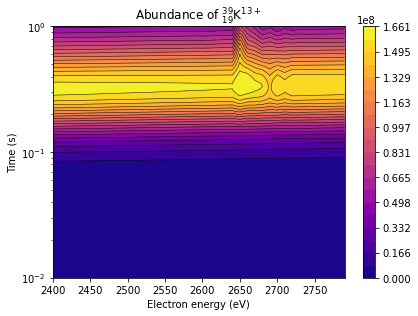

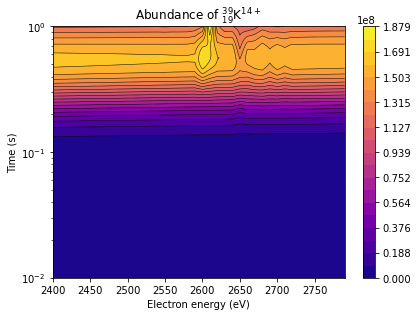

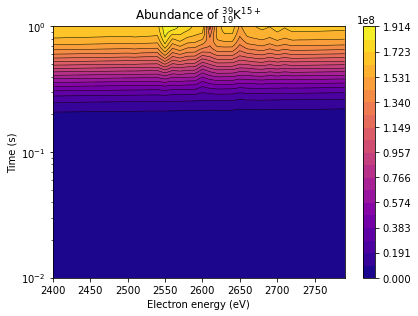

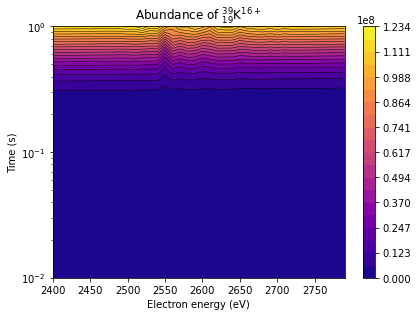

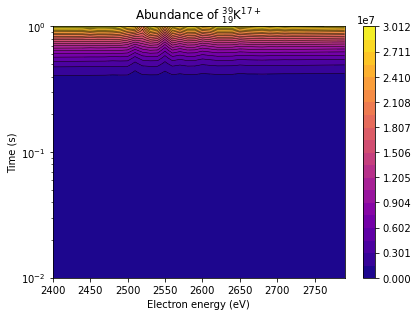

In [20]:
rr.plot_abundance_of_cs(13, ylim=(1e-2, 1), yscale="log")
rr.plot_abundance_of_cs(14, ylim=(1e-2, 1))
rr.plot_abundance_of_cs(15, ylim=(1e-2, 1))
rr.plot_abundance_of_cs(16, ylim=(1e-2, 1))
_ = rr.plot_abundance_of_cs(17, ylim=(1e-2, 1))